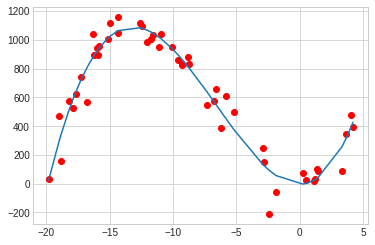

In [49]:
# Chase Capron 
# HW 1 - Part 2
# "I pledge my honor that I have abided by the Stevens Honor System."

# Number 1

import sklearn
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

# Used flatten() to allow polyfit() to work with given variable types
x_real = x.flatten() # Generated X Data
y_real = y.flatten() # Generated Y data
x_sorted = np.sort(x_real) # Make random x values sorted for use on plot

m = np.polyfit(x_real, y_real, 4) # Chose m = 4
n = np.poly1d(m) # Returns the polynomial coefficients into a 1-D array
y_new = n(x_sorted) # Feed in sorted x values to polynomial to create new y values

from sklearn.model_selection import train_test_split

# Split training and testing data 80% and 20% randomly respectively
x_train, x_test, y_train, y_test = train_test_split(x_real,y_real,test_size=.2)

plt.plot(x_sorted, y_new)

[294001.6507732576, 289772.5354341699, 403016.5410845219, 402795.2417396092, 402546.65323258564, 402576.7934065922, 406465.60128830967, 412817.80405298684]
m VS MSE


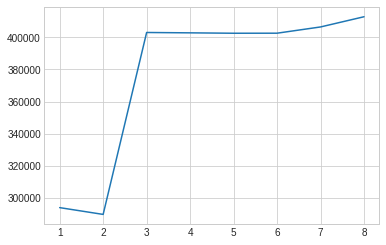

[403016.5410845219, 402795.2417396092, 402546.65323258564, 402576.7934065922, 406465.60128830967, 412817.80405298684]
Min MSE: 402546.65323258564
Best value of m: 5


In [50]:
# Number 2

# After running the generated dataset a few times, I made it capable of choosing the best m value
# that was above m=2 and would choose the lowest MSE out of all of them. The answers could vary
# based on the data generated first but the answer is stored in 'best_m'

MSE = []
MSE_x = [1,2,3,4,5,6,7,8]

for i in MSE_x:
  m = np.polyfit(x_train, y_train, i, full=False)
  n = np.poly1d(m)
  y_new = n(np.sort(x_train))
  MSE_val = np.square(np.subtract(y_train, y_new)).mean()
  MSE.append(MSE_val)

print(MSE) # Raw MSE list

print("m VS MSE")
plt.plot(MSE_x, MSE)
plt.show()

# It can be seen that both m=1 and m=2 are not suitable for fitting the data, so only m=3 and above are considered
MSE.pop(0) # Removes m=1 MSE from list
MSE.pop(0) # Removes m=2 MSE from list

MSE_min = min(MSE) # Determing lowest MSE for m selection

print(MSE) # Modified MSE list removing m=1 and m=2
print("Min MSE:", MSE_min)

best_m = MSE.index(MSE_min) + 3 # Returns index of min MSE plus 3 to account for m=1,2 and index start at 0
print("Best value of m:", best_m)



Noise Scale: 150
m: 5


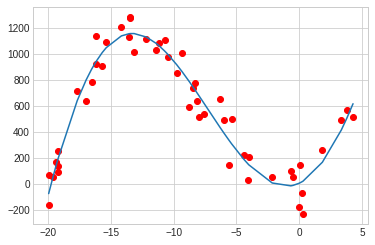

Noise Scale: 200
m: 5


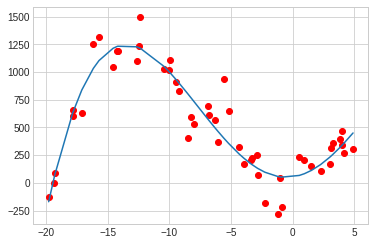

Noise Scale: 400
m: 5


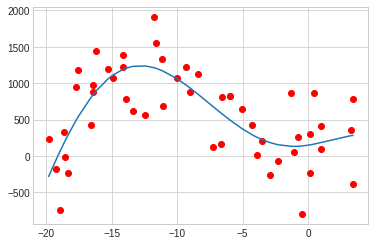

Noise Scale: 600
m: 5


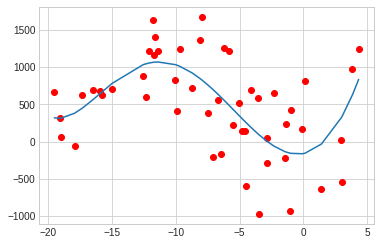

Noise Scale: 1000
m: 5


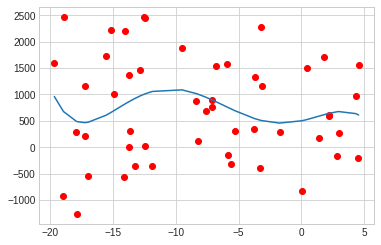

In [51]:
# Number 3

# In this problem, it can be seen that changing the scale of the noise greatly affects
# the accuracy of the polyfit() function based on the chosen m value. As the noise
# scale is increased, the data points are more spread out from the polyfit() curve.
# The MSE as a result would increase since the noise is increased.

noise = [150,200,400,600,1000]

for i in noise:
  noise_scale = i
  number_of_samples = 50
  x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
  y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
  x_real = x.flatten()
  y_real = y.flatten()
  x_sorted = np.sort(x_real)
  m = np.polyfit(x_real, y_real, best_m) # Using best m value calculated in Number 2
  n = np.poly1d(m)
  y_new = n(x_sorted)
  print("Noise Scale:", i)
  print("m:", best_m)
  plt.plot(x,y,'ro')
  plt.plot(x_sorted, y_new)
  plt.show()

Sample Size: 40
m: 5


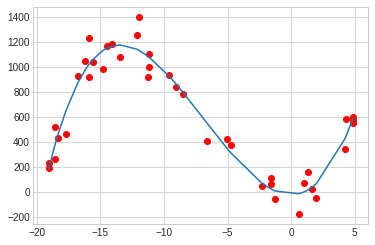

Sample Size: 30
m: 5


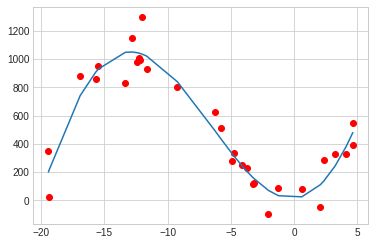

Sample Size: 20
m: 5


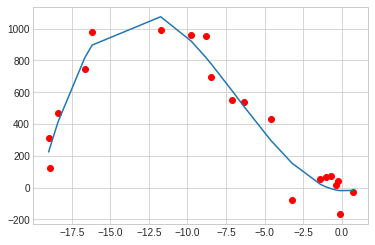

Sample Size: 10
m: 5


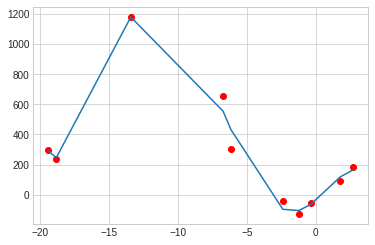

In [52]:
# Number 4

# In this problem, it can be seen that as the number of samples decreases,
# the shape of curve becomes more predictable as it is being created based
# on the samples you give it. The more samples that are provided, the better
# the polyfit() function will fit the curve for new data. When less samples
# are provided, the polyfit() function will only be suited for the training data
# and new data will yield a high MSE since it will not follow the curve.

sample_size = [40,30,20,10]

for i in sample_size:
  noise_scale = 100
  number_of_samples = i
  x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
  y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
  x_real = x.flatten()
  y_real = y.flatten()
  x_sorted = np.sort(x_real)
  m = np.polyfit(x_real, y_real, best_m) # Using best m value calculated in Number 2
  n = np.poly1d(m)
  y_new = n(x_sorted)
  print("Sample Size:", i)
  print("m:", best_m)
  plt.plot(x,y,'ro')
  plt.plot(x_sorted, y_new)
  plt.show()